In [74]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

t20_data = pd.read_csv('ball_by_ball_ipl.csv')

In [75]:
t20_data['Bowler Runs Conceded'].value_counts()

Bowler Runs Conceded
1    96033
0    87959
4    27095
2    15690
6    11518
3      849
5      472
7       77
Name: count, dtype: int64

### Methods of Dismissal

 We will start of by using the ball by ball data to create pie chart detailing the relative occurence of all the different methods of dismissal.

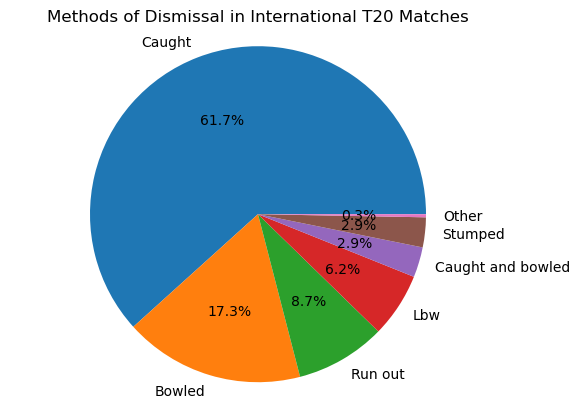

In [76]:
# Filter data frame to get rid of N/A values in the method column
filtered_df = t20_data[t20_data['Method'] != 'N/A']

# Count values in filtered data frame
value_counts = filtered_df['Method'].value_counts()

threshold = 50  # Set the minimum occurrence count for displaying a slice

# Filter out the methods with occurrence count below the threshold
filtered_value_counts = value_counts[value_counts >= threshold]

# Create a custom "Other" category to group rare methods below the threshold
other_count = value_counts[value_counts < threshold].sum()
filtered_value_counts['other'] = other_count

# Capitalize the first letter of each label using str.capitalize()
labels = filtered_value_counts.index.str.capitalize()

# Plot the pie chart with the filtered value counts
plt.pie(filtered_value_counts, labels=labels, autopct='%.1f%%')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Methods of Dismissal in International T20 Matches')
plt.show()



### Runs and Wickets per Over

In order to get an understadning of trends in scoring and wicket taking throughout the course of a T20 innings, we plot average runs per over as well as average wickets per over for overs 1-20.

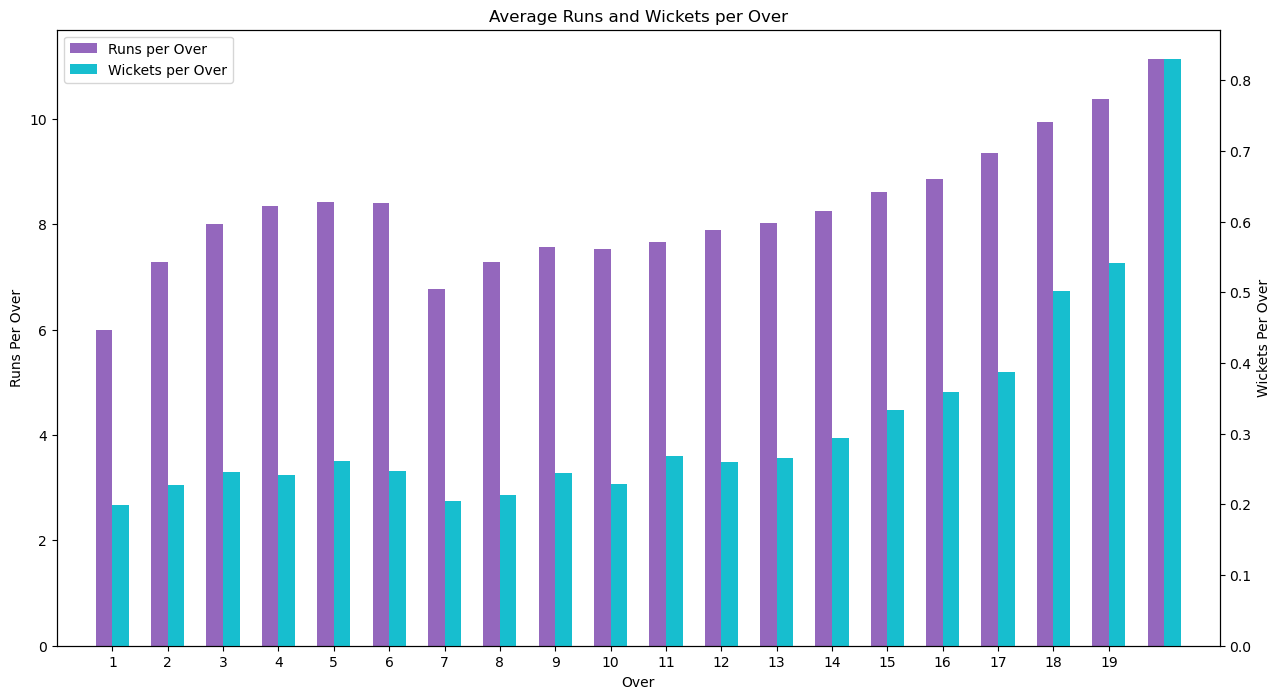

In [77]:
overs = list(np.arange(1,21))
Rpo = []
Wpo = []
for over in overs:
    over_df = t20_data.loc[t20_data['Over'] == over]   
    total_balls = len(over_df[over_df['Ball Rebowled'] == 0].index)
    avg_wick_pb = over_df['Wicket'].sum()/(total_balls)
    avg_pb = over_df['Runs From Ball'].sum()/(total_balls)
    Wpo.append(avg_wick_pb*6)
    Rpo.append(avg_pb*6)


# Create a figure and axis object
fig , ax = plt.subplots(figsize=(15, 8))

# Set the x-axis label
ax.set_xlabel('Over')

# Set the y-axis label for the first field
ax.set_ylabel('Runs Per Over', color='k')

# Create the bar chart for the first field
ax.bar(np.array(overs) - 0.15, Rpo, color='tab:purple', label='Runs per Over', width=0.3)

# Create a second y-axis object
ax2 = ax.twinx()

# Set the y-axis label for the second field
ax2.set_ylabel('Wickets Per Over', color='k')

# Create the bar chart for the second field
ax2.bar(np.array(overs) + 0.15, Wpo, color='tab:cyan',label = 'Wickets per Over', width=0.3)

# Set the x-axis limits to ensure all bars are visible
ax.set_xlim([0, 21])
# create the legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.xticks(np.arange(1, 20, step=1))
# Show the plot
plt.title('Average Runs and Wickets per Over')
plt.show()








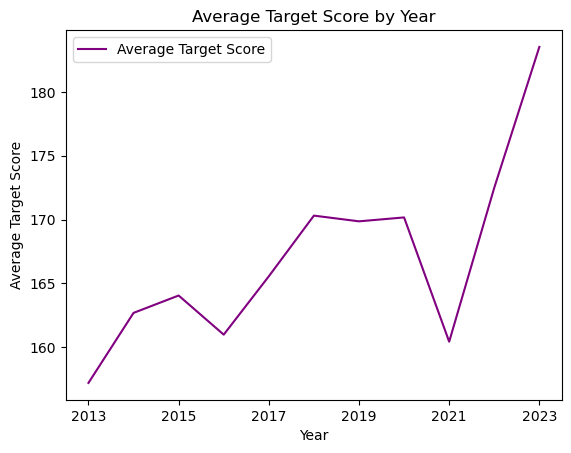

In [78]:
years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
year_targets = []
for year in years:
    targets = []
    year_df = t20_data[t20_data['Date'].str.slice(stop=4) == year]
    
    for j in range(len(year_df.index)-1):
        if year_df['Match ID'].iloc[j] != year_df['Match ID'].iloc[j+1]:
            targets.append(year_df['Target Score'].iloc[j])
    
    year_targets.append(sum(targets)/len(targets))

df = pd.DataFrame({'Average Target Score': year_targets}, index=years)
# Plot the data against years

df.plot(kind='line', color='purple')

# Set the title and axis labels
plt.title('Average Target Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Target Score')

# Show the plot
plt.show()





The average first innings score is trending upwards.

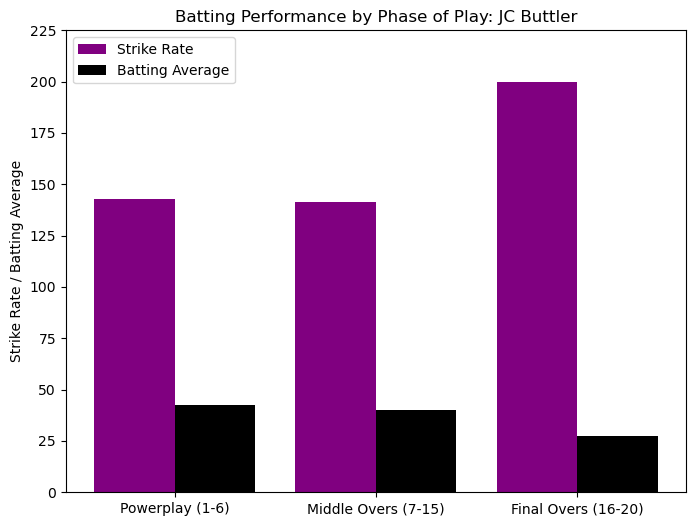

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

powerplay_df = t20_data.loc[(t20_data['Over'] >= 1) & (t20_data['Over'] <= 6)]
middle_df = t20_data.loc[(t20_data['Over'] >= 7) & (t20_data['Over'] <= 15)]
end_df = t20_data.loc[(t20_data['Over'] >= 16) & (t20_data['Over'] <= 20)]

player = 'JC Buttler'
dfs =[powerplay_df, middle_df, end_df]
AVGs = []
SRs = []
BASRAs = []
for df in dfs:
    player_mask = (df['Batter'] == player)
    batter_df = df.loc[player_mask]
    n_outs = len(df[df['Player Out'] == player].index)
    total_runs = sum(batter_df['Batter Runs'])
    total_bf = len(batter_df[batter_df['Ball Rebowled'] == 0].index)
    bat_avg = total_runs/n_outs
    sr = (total_runs/total_bf)*100
    basra = bat_avg + sr
    AVGs.append(bat_avg)
    SRs.append(sr)
    BASRAs.append(basra)



# Example data
stages = ['Powerplay (1-6)', 'Middle Overs (7-15)', 'Final Overs (16-20)']

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Set the x-axis labels and positions
x_labels = stages
x_positions = np.arange(len(x_labels))


ax.bar(x_positions, SRs, width=0.4, label='Strike Rate', color='purple')

# Plot the batting average bars

ax.bar(x_positions+0.4, AVGs, width=0.4, label='Batting Average', color = 'black')

# Set the y-axis limits and labels
ax.set_ylim([0, 225])
ax.set_ylabel('Strike Rate / Batting Average')

# Set the title and legend
ax.set_title('Batting Performance by Phase of Play: JC Buttler')
ax.legend()

# Add the x-axis labels and tick marks
ax.set_xticks(x_positions+0.2)
ax.set_xticklabels(x_labels)

plt.show()


    








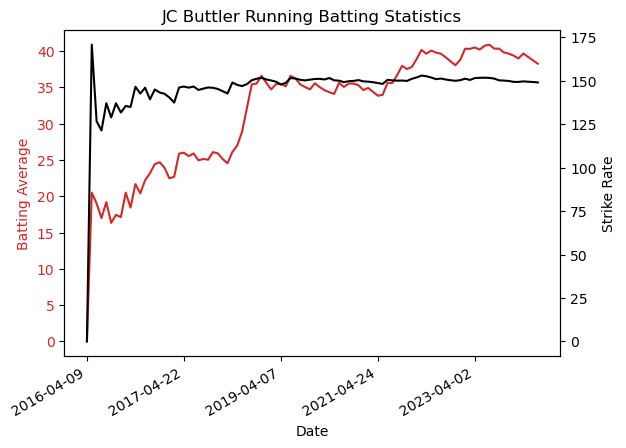

In [80]:
player = 'JC Buttler'

# SLice the data frame by when player is at the crease
player_df =t20_data[(t20_data['Batter' ]== player) | (t20_data['Non Striker'] == player)]

# Get a list of unique dates in date_col
unique_dates = player_df['Date'].unique()

# Sort the unique dates in ascending order
unique_dates_sorted = sorted(unique_dates)

player_data = []
n_outs = 0
total_runs = 0
total_bf = 0

for date in unique_dates_sorted:
    game_df = player_df[player_df['Date'] == date]
    batter_df = game_df[game_df['Batter'] == player]
    runs = batter_df['Batter Runs'].sum()
    # Check if any value in 'Player Out' column is equal to player
    if player in game_df['Player Out'].values:
        n_outs += 1
    bf = len(batter_df[batter_df['Ball Rebowled'] == 0].index)
    total_runs += runs
    total_bf += bf
    player_data.append([player, date, total_runs/n_outs, (total_runs/total_bf)*100])
    
player_data_df = pd.DataFrame(player_data, columns= ['Player', 'Date', 'Batting Average', 'Strike Rate'])
# Set up the plot
fig, ax1 = plt.subplots()

# Plot the first data set on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Batting Average', color=color)
ax1.plot(player_data_df['Date'], player_data_df['Batting Average'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis on the right side of the plot
ax2 = ax1.twinx()

# Plot the second data set on the right y-axis
color = 'k'
ax2.set_ylabel('Strike Rate', color=color)
ax2.plot(player_data_df['Date'], player_data_df['Strike Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set the tick frequency on the x-axis
ax1.xaxis.set_major_locator(plt.MaxNLocator(6))

# Display legend
ax.legend()

# Format the dates on the x-axis
fig.autofmt_xdate()

plt.title('JC Buttler Running Batting Statistics')

# Show the plot
plt.show()



/var/folders/dq/r162x_ld4ydb57pdv1b88jh00000gn/T/ipykernel_61227/3779576805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_df['Date'] = pd.to_datetime(middle_df['Date'])


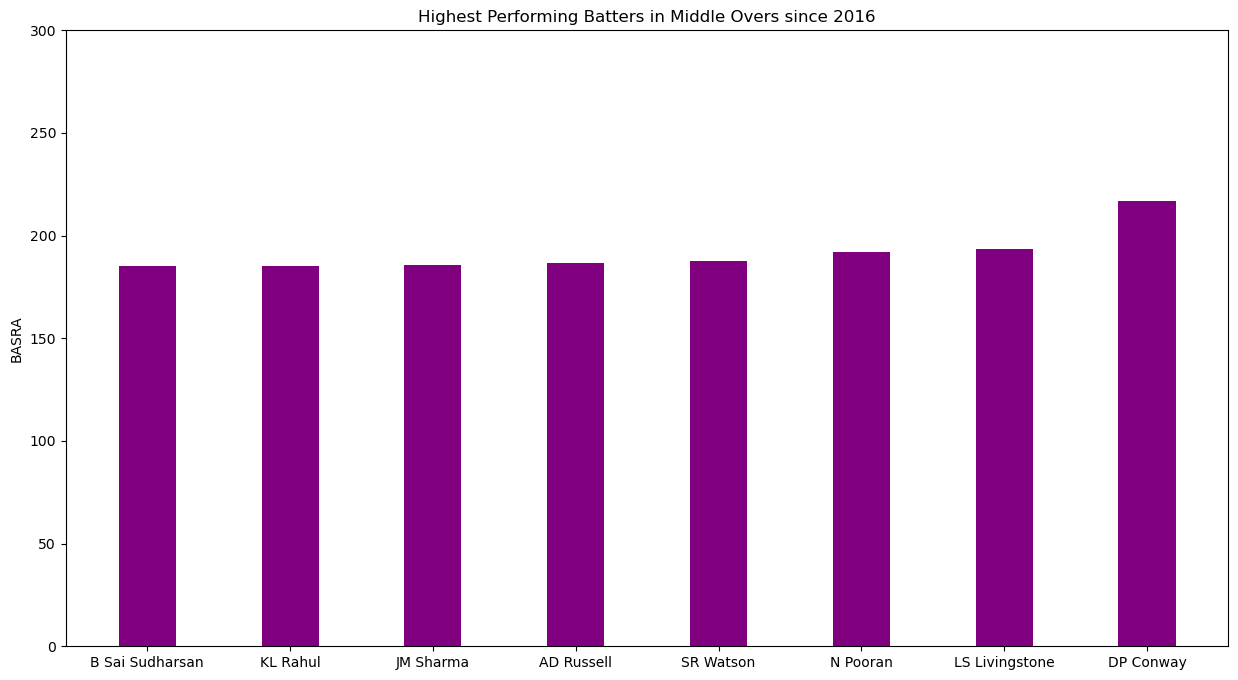

In [81]:
# Convert the "date" column to datetime format
middle_df['Date'] = pd.to_datetime(middle_df['Date'])

# Slice the dataframe by values in the "date" column after the year 2015
middle_df = middle_df[middle_df['Date'].dt.year > 2015]

# Get list of batters that have been at the crease during the middle overs in this period
batter_list = middle_df['Batter'].unique().tolist()
BATTER = []
BASRA = []
BASRA2 = []
for batter in batter_list:
    batter_df = middle_df.loc[middle_df['Batter'] == batter]
    
    
    if len(batter_df.index) > 200:
        BATTER.append(batter)
        n_outs = len(middle_df[middle_df['Player Out'] == batter].index)
        
        
        total_runs = sum(batter_df['Batter Runs'])
        total_bf = len(batter_df[batter_df['Ball Rebowled'] == 0].index)
        bat_avg = total_runs/n_outs
        sr = (total_runs/total_bf)*100
        BASRA.append(bat_avg + sr)
        BASRA2.append(2*bat_avg + sr)

# convert the list to a numpy array
BASRA = np.array(BASRA)

# get the indices of the 8 max values
max_indices = np.argsort(BASRA)[-8:]
max_batters = [BATTER[i]for i in max_indices]
max_BASRAs = [BASRA[i] for i in max_indices]

fig, ax = plt.subplots(figsize=(15, 8))

x_labels = max_batters
x_positions = np.arange(len(x_labels))

ax.bar(x_positions, max_BASRAs, width=0.4, label='BASRA', color='purple')

# Set the y-axis limits and labels
ax.set_ylim([0, 300])
ax.set_ylabel('BASRA')

# Add the x-axis labels and tick marks
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)

# Set the title and legend
ax.set_title('Highest Performing Batters in Middle Overs since 2016')


plt.show()

        

    

There are some big names that rank atop the list of highest BASRA in the IPL since 2016 with Devon Conway topping the list by quite a distance. This shows his proficiecny at navigating the middle overs when some batters can get bogged down and struggle to score against spinners in particular.

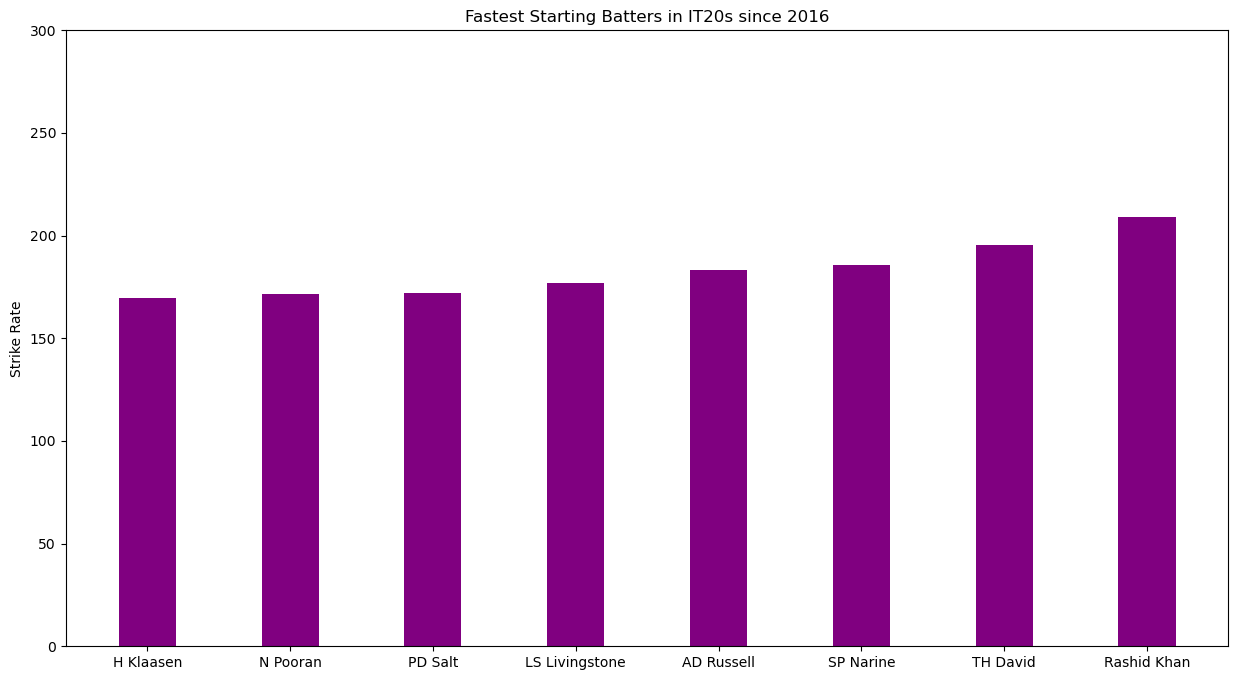

In [82]:
t20_data['Date'] = pd.to_datetime(t20_data['Date'])
starts = t20_data[t20_data['Date'].dt.year > 2015]
starts.loc[:, 'Valid Ball'] = (starts['Ball Rebowled'] != 1).astype(int)
batter_list = starts['Batter'].unique().tolist()
SRs = []
batters = []
for batter in batter_list:
    
    batter_df = starts.loc[starts['Batter'] == batter]
    ids = batter_df['Match ID'].unique()
    first10 = []
    for match_id in ids:
        game_df = batter_df[batter_df['Match ID'] == match_id]
        cum_sum = 0
        index_to_stop = 0
        for index, row in game_df.iterrows():
            cum_sum += row['Valid Ball']
            if cum_sum >= 10:
                index_to_stop = index + 1
                break
        game_df = game_df.iloc[:index_to_stop]
        first10.append(game_df)
    first10 = pd.concat(first10, axis=0)
    if len(first10.index) > 100:
        batters.append(batter)
        SRs.append((first10['Batter Runs'].sum()/len(first10[first10['Ball Rebowled'] == 0].index))*100)
    

# convert the list to a numpy array
SRs = np.array(SRs)

# get the indices of the 8 max values
max_indices = np.argsort(SRs)[-8:]
max_batters = [batters[i]for i in max_indices]
max_SRs = [SRs[i] for i in max_indices]

fig, ax = plt.subplots(figsize=(15, 8))

x_labels = max_batters
x_positions = np.arange(len(x_labels))

ax.bar(x_positions, max_SRs, width=0.4, label='First 10 Balls of Innings Strike Rate', color='purple')

# Set the y-axis limits and labels
ax.set_ylim([0, 300])
ax.set_ylabel('Strike Rate')

# Add the x-axis labels and tick marks
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)

# Set the title and legend
ax.set_title('Fastest Starting Batters in IT20s since 2016')


plt.show()
        
        
    

Tim David and Andre Russell rank among the fastest starers since 2016 in the IPL. Many of the players appearing in the top 8 are valued for their middle-lower order hitting.

## Batting and Bowling Statistics

In [83]:
import pandas as pd

df = t20_data.copy()

# Step 0: Create a 'valid_ball' column
df['valid_ball'] = (df['Ball Rebowled'] != 1).astype(int)

# Step 1: Group by Batter and calculate the total runs and valid balls faced
grouped_runs_balls = df.groupby('Batter').agg(
    total_runs=('Batter Runs', 'sum'),
    balls_faced=('valid_ball', 'sum'),
    innings=('Match ID', 'nunique')
)

# Step 2: Count the number of times each batter is out
outs = df.groupby('Player Out').size().reset_index(name='num_outs')
outs.rename(columns={'Player Out': 'Batter'}, inplace=True)

# Step 3: Merge the two dataframes on 'Batter'
merged = pd.merge(grouped_runs_balls, outs, on='Batter', how='left').fillna(0)

# Step 4: Calculate batting average and strike rate
merged['batting_avg'] = merged['total_runs'] / merged['num_outs'].replace(0, 1)  # handle potential division by zero
merged['strike_rate'] = (merged['total_runs'] / merged['balls_faced']) * 100

def get_batter_teams(row):
    if row['Innings'] == 1:
        team = row['Bat First']
    else:
        team = row['Bat Second']
    
    return team

# Apply the get_batter_countries function to each row
df['Batter Team'] = df.apply(get_batter_countries, axis=1)

# Step 6: Merge the bowler's country information into the merged DataFrame
batter_team = df.groupby('Batter')['Batter Team'].unique().apply("/".join)
batter_data = pd.merge(batter_team, merged, on='Batter', how='left')

batter_data['bf_pw'] = batter_data['balls_faced']/batter_data['num_outs']
batter_data['bf_pi'] = batter_data['balls_faced']/batter_data['innings']


# Handle NaN values (possible division by zero scenarios)
batter_data.fillna(0, inplace=True)


# Reset index to have Batter as a column
result_df = batter_data.reset_index()[['Batter', 'Batter Team', 'innings', 'total_runs', 'balls_faced', 'num_outs', 'batting_avg', 'strike_rate', 'bf_pi', 'bf_pw']]
result_df.rename(columns={'Batter Team':'Team(s)'}, inplace=True)
result_df.to_csv('data_files/batting_stats_ipl.csv')
result_df

,Batter,Team(s),innings,total_runs,balls_faced,num_outs,batting_avg,strike_rate,bf_pi,bf_pw
0,A Ashish Reddy,Sunrisers Hyderabad/Deccan Chargers,22,266,181,14.0,19.000000,146.961326,8.227273,12.928571
1,A Badoni,Lucknow Super Giants,22,340,268,18.0,18.888889,126.865672,12.181818,14.888889
2,A Chandila,Rajasthan Royals,2,4,7,0.0,4.000000,57.142857,3.500000,inf
3,A Chopra,Kolkata Knight Riders,6,53,71,6.0,8.833333,74.647887,11.833333,11.833333
4,A Choudhary,Royal Challengers Bangalore,3,25,20,1.0,25.000000,125.000000,6.666667,20.000000
...,...,...,...,...,...,...,...,...,...,...
632,Yashpal Singh,Kolkata Knight Riders,3,27,47,3.0,9.000000,57.446809,15.666667,15.666667
633,Younis Khan,Rajasthan Royals,1,3,7,1.0,3.000000,42.857143,7.000000,7.000000
634,Yudhvir Singh,Lucknow Super Giants,2,1,2,2.0,0.500000,50.000000,1.000000,1.000000
635,Yuvraj Singh,Kings XI Punjab/Mumbai Indians/Royal Challenge...,124,2696,2078,109.0,24.733945,129.740135,16.758065,19.064220


In [84]:
import pandas as pd

df = t20_data.copy()

# Step -1: Create a 'valid_ball' column
df['valid_ball'] = (df['Ball Rebowled'] != 1).astype(int)

# Step 0: Filter rows where Method suggests the bowler took a wicket
relevant_methods = ["bowled", "caught", "lbw", "stumped", "hit wicket", "caught & bowled"]
wickets_df = df[df['Method'].isin(relevant_methods)]

# Step 1: Group by Bowler to aggregate runs given, balls bowled, and wickets taken
bowler_data = df.groupby('Bowler').agg(
    runs_conceded=('Bowler Runs Conceded', 'sum'),
    balls_bowled=('valid_ball', 'sum')
)
bowler_data['wickets'] = wickets_df.groupby('Bowler').size()

# Step 2: Calculate bowling average and economy
bowler_data['bowling_avg'] = bowler_data['runs_conceded'] / bowler_data['wickets']
bowler_data['economy'] = bowler_data['runs_conceded'] / (bowler_data['balls_bowled'] / 6)  # convert balls to overs
bowler_data['strike_rate'] = bowler_data['balls_bowled'] / bowler_data['wickets']

matches_bowled = df.groupby('Bowler')['Match ID'].nunique()
bowler_data['matches_bowled'] = matches_bowled


# Step 5: Determine the bowler's countries based on innings and team names
def get_bowler_teams(row):
    if row['Innings'] == 1:
        team = row['Bat Second']
    else:
        team = row['Bat First']
    
    return team

# Apply the get_bowler_countries function to each row
df['Bowler Team'] = df.apply(get_bowler_teams, axis=1)

# Step 6: Merge the bowler's country information into the bowler_data DataFrame
bowler_team = df.groupby('Bowler')['Bowler Team'].unique().apply("/".join)

bowler_data['Team(s)'] = bowler_team

bowler_data['balls_bowled_pm'] = bowler_data['balls_bowled']/bowler_data['matches_bowled']
bowler_data['wickets_pm'] = bowler_data['wickets']/bowler_data['matches_bowled']

# Handle NaN values (possible division by zero scenarios)
bowler_data.fillna(0, inplace=True)

# Reset index to have Bowler as a column
bowler_result = bowler_data.reset_index()[['Bowler', 'Team(s)', 'matches_bowled', 'wickets', 'balls_bowled','runs_conceded', 'bowling_avg', 'economy', 'strike_rate', 'balls_bowled_pm', 'wickets_pm']]

bowler_result.to_csv('data_files/bowling_stats_ipl.csv')


In [85]:


# Consider games from 2022 season onwards
df = t20_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
date = '2022-01-01'
date = pd.to_datetime(date)
df = df[df['Date'] > date]

# Step -1: Create a 'valid_ball' column
df['Valid Ball'] = (df['Ball Rebowled'] != 1).astype(int)

# Step 0: Filter rows where Method suggests the bowler took a wicket
relevant_methods = ["bowled", "caught", "lbw", "stumped", "hit wicket", "caught & bowled"]
wickets_df = df[df['Method'].isin(relevant_methods)]

# Step 1: Group by Bowler to aggregate runs given, balls bowled, and wickets taken
bowler_data = df.groupby('Bowler').agg(
    runs_conceded=('Bowler Runs Conceded', 'sum'),
    balls_bowled=('Valid Ball', 'sum')
)
bowler_data['wickets'] = wickets_df.groupby('Bowler').size()

# Step 2: Calculate bowling average and economy
bowler_data['bowling_avg'] = bowler_data['runs_conceded'] / bowler_data['wickets']
bowler_data['economy'] = bowler_data['runs_conceded'] / (bowler_data['balls_bowled'] / 6)  # convert balls to overs
bowler_data['bowling_strike_rate'] = bowler_data['balls_bowled'] / bowler_data['wickets']

matches_bowled = df.groupby('Bowler')['Match ID'].nunique()
bowler_data['matches_bowled'] = matches_bowled


# Step 5: Determine the bowler's countries based on innings and team names
def get_bowler_teams(row):
    if row['Innings'] == 1:
        team = row['Bat Second']
    else:
        team = row['Bat First']
    
    return team

# Apply the get_bowler_countries function to each row
df['Bowler Teams'] = df.apply(get_bowler_teams, axis=1)

# Step 6: Merge the bowler's country information into the bowler_data DataFrame
bowler_teams = df.groupby('Bowler')['Bowler Teams'].unique().apply("/".join)
bowler_data['Team(s)'] = bowler_teams

bowler_data['balls_bowled_pm'] = bowler_data['balls_bowled']/bowler_data['matches_bowled']
bowler_data['wickets_pm'] = bowler_data['wickets']/bowler_data['matches_bowled']

# Handle NaN values (possible division by zero scenarios)
bowler_data.fillna(0, inplace=True)

# Reset index to have Bowler as a column
bowlers = bowler_data.reset_index()[['Bowler', 'Team(s)', 'matches_bowled', 'wickets', 'balls_bowled','runs_conceded', 'bowling_avg', 'economy', 'bowling_strike_rate', 'balls_bowled_pm', 'wickets_pm']]

df = t20_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
date = '2022-01-01'
date = pd.to_datetime(date)
df = df[df['Date'] > date]

# Step 0: Create a 'valid_ball' column
df['Valid Ball'] = (df['Ball Rebowled'] != 1).astype(int)

# Step 1: Group by Batter and calculate the total runs and valid balls faced
grouped_runs_balls = df.groupby('Batter').agg(
    total_runs=('Batter Runs', 'sum'),
    balls_faced=('Valid Ball', 'sum'),
    innings=('Match ID', 'nunique')
)

# Step 2: Count the number of times each batter is out
outs = df.groupby('Player Out').size().reset_index(name='num_outs')
outs.rename(columns={'Player Out': 'Batter'}, inplace=True)

# Step 3: Merge the two dataframes on 'Batter'
merged = pd.merge(grouped_runs_balls, outs, on='Batter', how='left').fillna(0)

# Step 4: Calculate batting average and strike rate
merged['batting_avg'] = merged['total_runs'] / merged['num_outs'].replace(0, 1)  # handle potential division by zero
merged['strike_rate'] = (merged['total_runs'] / merged['balls_faced']) * 100

def get_batter_teams(row):
    if row['Innings'] == 1:
        team = row['Bat First']
    else:
        team = row['Bat Second']
    
    return team

# Apply the get_batter_countries function to each row
df['Batter Teams'] = df.apply(get_batter_teams, axis=1)

# Step 6: Merge the bowler's country information into the merged DataFrame
batter_teams = df.groupby('Batter')['Batter Teams'].unique().apply("/".join)
batter_data = pd.merge(batter_teams, merged, on='Batter', how='left')


# Handle NaN values (possible division by zero scenarios)
batter_data.fillna(0, inplace=True)
batter_data['bf_pw'] = 0
for i in range(len(batter_data.index)):
    if batter_data['num_outs'].iloc[i] == 0:
        batter_data['bf_pw'].iloc[i] = batter_data['balls_faced'].iloc[i]
    else:
        batter_data['bf_pw'].iloc[i] = batter_data['balls_faced'].iloc[i]/batter_data['num_outs'].iloc[i]
    
batter_data['bf_pi'] = batter_data['balls_faced']/batter_data['innings']
batter_data.rename(columns={'Batter Teams': 'Team(s)'}, inplace=True)

# Reset index to have Batter as a column
result_df = batter_data.reset_index()[['Batter', 'Team(s)', 'innings', 'total_runs', 'balls_faced', 'num_outs', 'batting_avg', 'strike_rate', 'bf_pi', 'bf_pw']]


batters = result_df
batters

/var/folders/dq/r162x_ld4ydb57pdv1b88jh00000gn/T/ipykernel_61227/324235569.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batter_data['bf_pw'].iloc[i] = batter_data['balls_faced'].iloc[i]/batter_data['num_outs'].iloc[i]


,Batter,Team(s),innings,total_runs,balls_faced,num_outs,batting_avg,strike_rate,bf_pi,bf_pw
0,A Badoni,Lucknow Super Giants,22,340,268,18.0,18.888889,126.865672,12.181818,14.888889
1,A Manohar,Gujarat Titans,13,222,158,12.0,18.500000,140.506329,12.153846,13.166667
2,A Mishra,Lucknow Super Giants,1,19,30,1.0,19.000000,63.333333,30.000000,30.000000
3,A Nortje,Delhi Capitals,8,38,35,3.0,12.666667,108.571429,4.375000,11.666667
4,A Tomar,Kolkata Knight Riders,1,4,8,1.0,4.000000,50.000000,8.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...
228,YBK Jaiswal,Rajasthan Royals,24,883,572,23.0,38.391304,154.370629,23.833333,24.869565
229,YS Chahal,Rajasthan Royals,1,5,8,1.0,5.000000,62.500000,8.000000,8.000000
230,YV Dhull,Delhi Capitals,3,16,23,3.0,5.333333,69.565217,7.666667,7.666667
231,Yash Dayal,Gujarat Titans,1,0,1,1.0,0.000000,0.000000,1.000000,1.000000


In [86]:
bowlers = bowlers[bowlers['matches_bowled'] > 5]
bowlers = bowlers[bowlers['wickets'] > 0]
bowlers.reset_index(drop=True, inplace=True)
batters = batters[batters['innings'] > 5]
batters.reset_index(drop=True, inplace=True)
batters

,Batter,Team(s),innings,total_runs,balls_faced,num_outs,batting_avg,strike_rate,bf_pi,bf_pw
0,A Badoni,Lucknow Super Giants,22,340,268,18.0,18.888889,126.865672,12.181818,14.888889
1,A Manohar,Gujarat Titans,13,222,158,12.0,18.500000,140.506329,12.153846,13.166667
2,A Nortje,Delhi Capitals,8,38,35,3.0,12.666667,108.571429,4.375000,11.666667
3,AD Russell,Kolkata Knight Riders,26,562,344,20.0,28.100000,163.372093,13.230769,17.200000
4,AK Markram,Sunrisers Hyderabad,25,629,470,19.0,33.105263,133.829787,18.800000,24.736842
...,...,...,...,...,...,...,...,...,...,...
118,VG Arora,Kolkata Knight Riders/Punjab Kings,6,8,15,2.0,4.000000,53.333333,2.500000,7.500000
119,VR Iyer,Kolkata Knight Riders,26,586,445,25.0,23.440000,131.685393,17.115385,17.800000
120,WP Saha,Gujarat Titans,28,688,544,26.0,26.461538,126.470588,19.428571,20.923077
121,Washington Sundar,Sunrisers Hyderabad,12,161,129,11.0,14.636364,124.806202,10.750000,11.727273


## Creating a Value over Average Player for T20 all-rounders

Understanding the value of all rounders in limited overs cricket has proved to be a challenging task. Comparing their batting ability directly with specialist batters and their bowling stats with specialist bowlers can fail to capture what they bring to a team with thier combinations of skills. So, instead of this, we will compare all-rounders with other all-rounders with equal importance placed on thier batting and bowling. We crudely define all-rounders as players that have faced over 100 legal deliveries and bowled over 100 legal deliveries over the last two year period in T20Is.

In [87]:
# Create a list of names common to both 'Batter' and 'Bowler' columns
common_names = list(set(batters['Batter']) & set(bowlers['Bowler']))

# Initialize an empty list to store merged DataFrames
merged_dfs = []

# Merge DataFrames for each common name along axis 1
for name in common_names:
    batter_subset = batters[batters['Batter'] == name].reset_index(drop=True)
    bowler_subset = bowlers[bowlers['Bowler'] == name].drop(['Bowler','Team(s)'], axis=1).reset_index(drop=True)
    
    merged_subset = pd.concat([batter_subset, bowler_subset], axis=1)
    merged_dfs.append(merged_subset)

# Combine all merged DataFrames into a single DataFrame
all_rounders = pd.concat(merged_dfs, ignore_index=True, axis=0)
all_rounders['balls_bowled_pm'] = all_rounders['balls_bowled']/all_rounders['matches_bowled']
all_rounders = all_rounders[all_rounders['balls_faced'] > 100]
all_rounders = all_rounders[all_rounders['balls_bowled']> 100]
all_rounders

,Batter,Team(s),innings,total_runs,balls_faced,num_outs,batting_avg,strike_rate,bf_pi,bf_pw,matches_bowled,wickets,balls_bowled,runs_conceded,bowling_avg,economy,bowling_strike_rate,balls_bowled_pm,wickets_pm
5,R Ashwin,Rajasthan Royals,21,258,185,13.0,19.846154,139.459459,8.809524,14.230769,30,26.0,696,871,33.500000,7.508621,26.769231,23.200000,0.866667
9,AD Russell,Kolkata Knight Riders,26,562,344,20.0,28.100000,163.372093,13.230769,17.200000,22,23.0,260,450,19.565217,10.384615,11.304348,11.818182,1.045455
11,MR Marsh,Delhi Capitals,17,379,286,17.0,22.294118,132.517483,16.823529,16.823529,12,16.0,193,272,17.000000,8.455959,12.062500,16.083333,1.333333
12,SN Thakur,Delhi Capitals/Kolkata Knight Riders,19,233,157,16.0,14.562500,148.407643,8.263158,9.812500,23,21.0,416,693,33.000000,9.995192,19.809524,18.086957,0.913043
15,AR Patel,Delhi Capitals,23,465,321,14.0,33.214286,144.859813,13.956522,22.928571,26,17.0,540,659,38.764706,7.322222,31.764706,20.769231,0.653846
16,MM Ali,Chennai Super Kings,20,368,264,17.0,21.647059,139.393939,13.200000,15.529412,20,15.0,275,340,22.666667,7.418182,18.333333,13.750000,0.750000
17,C Green,Mumbai Indians,16,452,279,9.0,50.222222,162.007168,17.437500,31.000000,16,6.0,228,361,60.166667,9.500000,38.000000,14.250000,0.375000
19,Washington Sundar,Sunrisers Hyderabad,12,161,129,11.0,14.636364,124.806202,10.750000,11.727273,15,9.0,274,385,42.777778,8.430657,30.444444,18.266667,0.600000
20,Rashid Khan,Gujarat Titans,17,221,104,8.0,27.625000,212.500000,6.117647,13.000000,33,45.0,785,973,21.622222,7.436943,17.444444,23.787879,1.363636
21,GJ Maxwell,Royal Challengers Bangalore,27,701,395,23.0,30.478261,177.468354,14.629630,17.173913,17,9.0,206,259,28.777778,7.543689,22.888889,12.117647,0.529412


In [88]:
weighted_avg_batting = (all_rounders['batting_avg'] * all_rounders['balls_faced']).sum() / all_rounders['balls_faced'].sum()
weighted_avg_strike_rate = (all_rounders['strike_rate'] * all_rounders['balls_faced']).sum() / all_rounders['balls_faced'].sum()
weighted_avg_bowling = (all_rounders['bowling_avg'] * all_rounders['balls_bowled']).sum() / all_rounders['balls_bowled'].sum()
weighted_avg_economy = (all_rounders['economy'] * all_rounders['balls_bowled']).sum() / all_rounders['balls_bowled'].sum()
weighted_avg_bowling_strike_rate = (all_rounders['bowling_strike_rate'] * all_rounders['balls_bowled']).sum() / all_rounders['balls_bowled'].sum()
weighted_balls_pm = (all_rounders['balls_bowled_pm'] * all_rounders['balls_bowled']).sum() / all_rounders['balls_bowled'].sum()

replacement_player = pd.DataFrame({
    'batting_avg': [weighted_avg_batting],
    'strike_rate': [weighted_avg_strike_rate],
    'bowling_avg': [weighted_avg_bowling],
    'economy': [weighted_avg_economy],
    'balls_bowled_pm': [weighted_balls_pm]
})


all_rounders['batting_avg_rank'] = all_rounders['batting_avg'].rank(ascending=False)
all_rounders['strike_rate_rank'] = all_rounders['strike_rate'].rank(ascending=False)
all_rounders['economy_rank'] = all_rounders['economy'].rank(ascending=True)
all_rounders['bowling_strike_rate_rank'] = all_rounders['bowling_strike_rate'].rank(ascending=True)
all_rounders['balls_bowled_pm_rank'] = all_rounders['balls_bowled_pm'].rank(ascending=False)



### Crude VOA Metric

This crude metric uses the ranks of each player in each of the five categories. Less importance was placed on the balls bowled per match category.

In [89]:
all_rounders['VOA'] = (
   (2.5*len(all_rounders.index) - (1.25*all_rounders['batting_avg_rank'] +
    1.25*all_rounders['strike_rate_rank'] +
    (all_rounders['balls_bowled_pm'] * 0.5) +
    all_rounders['economy_rank'] +
    all_rounders['bowling_strike_rate_rank']))/5
)

all_rounders.sort_values(by='VOA', ascending=False)

,Batter,Team(s),innings,total_runs,balls_faced,num_outs,batting_avg,strike_rate,bf_pi,bf_pw,...,economy,bowling_strike_rate,balls_bowled_pm,wickets_pm,batting_avg_rank,strike_rate_rank,economy_rank,bowling_strike_rate_rank,balls_bowled_pm_rank,VOA
21,GJ Maxwell,Royal Challengers Bangalore,27,701,395,23.0,30.478261,177.468354,14.629630,17.173913,...,7.543689,22.888889,12.117647,0.529412,5.0,2.0,6.0,7.0,15.0,3.438235
20,Rashid Khan,Gujarat Titans,17,221,104,8.0,27.625000,212.500000,6.117647,13.000000,...,7.436943,17.444444,23.787879,1.363636,8.0,1.0,4.0,4.0,1.0,2.771212
9,AD Russell,Kolkata Knight Riders,26,562,344,20.0,28.100000,163.372093,13.230769,17.200000,...,10.384615,11.304348,11.818182,1.045455,6.0,4.0,18.0,1.0,16.0,1.518182
36,LS Livingstone,Punjab Kings,23,716,404,20.0,35.800000,177.227723,17.565217,20.200000,...,9.866667,30.000000,10.588235,0.352941,3.0,3.0,13.0,12.0,18.0,1.441176
35,MP Stoinis,Lucknow Super Giants,24,558,373,20.0,27.900000,149.597855,15.541667,18.650000,...,10.037383,11.888889,10.700000,0.900000,7.0,6.0,15.0,2.0,17.0,1.280000
15,AR Patel,Delhi Capitals,23,465,321,14.0,33.214286,144.859813,13.956522,22.928571,...,7.322222,31.764706,20.769231,0.653846,4.0,8.0,2.0,14.0,4.0,0.723077
17,C Green,Mumbai Indians,16,452,279,9.0,50.222222,162.007168,17.437500,31.000000,...,9.500000,38.000000,14.250000,0.375000,1.0,5.0,12.0,16.0,12.0,0.475000
16,MM Ali,Chennai Super Kings,20,368,264,17.0,21.647059,139.393939,13.200000,15.529412,...,7.418182,18.333333,13.750000,0.750000,13.0,10.0,3.0,5.0,13.0,0.275000
40,HH Pandya,Gujarat Titans,30,833,621,22.0,37.863636,134.138486,20.700000,28.227273,...,8.108108,41.625000,15.857143,0.380952,2.0,12.0,8.0,17.0,10.0,-1.085714
11,MR Marsh,Delhi Capitals,17,379,286,17.0,22.294118,132.517483,16.823529,16.823529,...,8.455959,12.062500,16.083333,1.333333,10.0,14.0,10.0,3.0,9.0,-1.208333


## Trying to determine value for batters and bowlers

There is no fielding data to draw on so all stats here ignore this important and often overlooked aspect of the game. Before, we tried to value all-rounders but now we want to determine value for batting as well as bowling.

In a study in 2019, the value of a wicket in T20 matches is found to be roughly 8.4 runs with regards to the first innings score. So this will be used in our analysis as value of a wicket. https://theparttimeanalyst.com/2019/06/17/the-value-of-a-wicket/

We define the runs added/lost as the difference between a batters strike rate and the average strike rate multiplied by the average number of balls a batter faces per innings in addition to the extra runs coming as a result of facing more balls per innings (due to fewer wickets being taken).

In [90]:
avg_strike_rate

140.46144317126044

In [91]:

avg_strike_rate = (batters['strike_rate'] * batters['balls_faced']).sum() / batters['balls_faced'].sum()
avg_bf = batters['balls_faced'].sum()/batters['num_outs'].sum()

batters.loc[:, 'runs_added_pi'] = ((batters['strike_rate'] - avg_strike_rate) / 100) * batters['bf_pi'] + ((batters['bf_pw'] - avg_bf) / avg_bf) * 8.4



batters.rename(columns={'Batter': 'Player'}, inplace=True)


mean = batters['runs_added_pi'].mean()

std = batters['runs_added_pi'].std()
# Scale the Batting Score to have mean 500 and standard deviation 125
batters.loc[:, 'bat_score'] = ((batters['runs_added_pi'] - mean) / std) * 125 + 500
batters.rename(columns={'Batter':'Player'},inplace=True)
batters = batters.sort_values(by='bat_score', ascending=False)
batters = batters[batters['innings'] >= 10]
batters.iloc[0:20]




/var/folders/dq/r162x_ld4ydb57pdv1b88jh00000gn/T/ipykernel_61227/3548743534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batters.loc[:, 'runs_added_pi'] = ((batters['strike_rate'] - avg_strike_rate) / 100) * batters['bf_pi'] + ((batters['bf_pw'] - avg_bf) / avg_bf) * 8.4
/var/folders/dq/r162x_ld4ydb57pdv1b88jh00000gn/T/ipykernel_61227/3548743534.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batters.rename(columns={'Batter': 'Player'}, inplace=True)
/var/folders/dq/r162x_ld4ydb57pdv1b88jh00000gn/T/ipykernel_61227/3548743534.py:15: SettingWithCopyWarni

,Player,Team(s),innings,total_runs,balls_faced,num_outs,batting_avg,strike_rate,bf_pi,bf_pw,runs_added_pi,bat_score
29,H Klaasen,Sunrisers Hyderabad,11,448,251,9.0,49.777778,178.486056,22.818182,27.888889,12.160353,867.142875
99,SA Yadav,Mumbai Indians,24,908,538,21.0,43.238095,168.773234,22.416667,25.619048,8.863178,775.623995
17,C Green,Mumbai Indians,16,452,279,9.0,50.222222,162.007168,17.437500,31.000000,8.566550,767.390554
89,RK Singh,Kolkata Knight Riders,21,648,430,13.0,49.846154,150.697674,20.476190,33.076923,7.790509,745.850175
110,Shubman Gill,Gujarat Titans,33,1373,922,29.0,47.344828,148.915401,27.939394,31.793103,7.509450,738.048911
20,DA Miller,Gujarat Titans,29,740,513,15.0,49.333333,144.249513,17.689655,34.200000,6.843173,719.555210
51,LS Livingstone,Punjab Kings,23,716,404,20.0,35.800000,177.227723,17.565217,20.200000,6.665567,714.625434
24,DP Conway,Chennai Super Kings,22,924,651,19.0,48.631579,141.935484,29.590909,34.263158,6.636171,713.809507
35,JC Buttler,Rajasthan Royals,31,1255,855,29.0,43.275862,146.783626,27.580645,29.482759,5.906696,693.561641
122,YBK Jaiswal,Rajasthan Royals,24,883,572,23.0,38.391304,154.370629,23.833333,24.869565,5.512276,682.613841


Klaasen, SKY and Rinku SIngh rank high over the last two seasons which checks out given their form.

To assign value to the runs reduced by bowlers compared to the average IPL bowler we first measure the runs reduced by virtue of their economy rate. Then, we account for thier wicket-taking ability by comparing their strike rate to the average. This formula leads to batters who bowl part-time being ranked above T20 specialist bowlers due to slightly better economy rates. So, I create a new metric, bowling score which also accounts for the number of balls bowled per match giving a small boost to players who bowl more often (a boost of 0.2 runs reduced per extra ball bowled). This makes very little difference to the pecking order of specialist bowlers however it bumps part-time bowlers down the rankings slightly. Mohit Sharma and Mohsin Khan rank 1st and 2nd respectively, with Rashid Khan 3rd. Many big names make up the rest of the top 20.

In [92]:
weighted_avg_economy = (bowlers['economy'] * bowlers['balls_bowled']).sum() / bowlers['balls_bowled'].sum()
weighted_avg_srbowl = (bowlers['bowling_strike_rate'] * bowlers['balls_bowled']).sum() / bowlers['balls_bowled'].sum()
weighted_avg_bbpm = (bowlers['balls_bowled_pm'] * bowlers['balls_bowled']).sum() / bowlers['balls_bowled'].sum()



bowlers['runs_reduced'] = ((weighted_avg_economy - bowlers['economy'])*bowlers['balls_bowled_pm'])/6 + (bowlers['balls_bowled_pm']/bowlers['bowling_strike_rate'] - bowlers['balls_bowled_pm']/weighted_avg_srbowl)*8.4

bowlers['bowl_score'] = bowlers['runs_reduced'] + 0.2*bowlers['balls_bowled_pm']

mean = bowlers['bowl_score'].mean()

std = bowlers['bowl_score'].std()

bowlers['bowl_score'] = ((bowlers['bowl_score'] - mean) / std) * 125 + 500

bowlers = bowlers.sort_values(by='bowl_score', ascending=False)
bowlers.rename(columns={'Bowler':'Player'},inplace=True)
bowlers = bowlers[bowlers['matches_bowled'] >= 10]
bowlers.iloc[0:20]

,Player,Team(s),matches_bowled,wickets,balls_bowled,runs_conceded,bowling_avg,economy,bowling_strike_rate,balls_bowled_pm,wickets_pm,runs_reduced,bowl_score
57,MM Sharma,Gujarat Titans,14,26.0,265,361,13.884615,8.173585,10.192308,18.928571,1.857143,9.694784,766.851876
62,Mohsin Khan,Lucknow Super Giants,13,17.0,258,304,17.882353,7.069767,15.176471,19.846154,1.307692,8.444226,736.796085
80,Rashid Khan,Gujarat Titans,33,45.0,785,973,21.622222,7.436943,17.444444,23.787879,1.363636,6.953879,717.022506
101,YS Chahal,Rajasthan Royals,31,48.0,725,959,19.979167,7.936552,15.104167,23.387097,1.548387,6.634213,705.760521
52,M Pathirana,Chennai Super Kings,13,19.0,299,401,21.105263,8.046823,15.736842,23.000000,1.461538,5.587450,674.095222
60,Mohammed Shami,Gujarat Titans,33,47.0,756,1011,21.510638,8.023810,16.085106,22.909091,1.424242,5.388473,667.978406
36,JR Hazlewood,Royal Challengers Bangalore,15,22.0,333,453,20.590909,8.162162,15.136364,22.200000,1.466667,5.436448,665.335110
74,PWH de Silva,Royal Challengers Bangalore,24,33.0,516,688,20.848485,8.000000,15.636364,21.500000,1.375000,5.464579,662.184022
33,JJ Bumrah,Mumbai Indians,14,14.0,320,383,27.357143,7.181250,22.857143,22.857143,1.000000,5.049497,658.137677
19,DJ Bravo,Chennai Super Kings,10,16.0,206,299,18.687500,8.708738,12.875000,20.600000,1.600000,5.175984,648.984918


In [93]:
alls = pd.merge(batters, bowlers, on='Player', how='outer').drop('Team(s)_x', axis=1)
alls.fillna(0, inplace=True)
alls['all_rounder_score'] = alls['bowl_score']*alls['bat_score']/1000
alls = alls.sort_values(by='all_rounder_score', ascending=False)
alls[['Player','matches_bowled', 'innings', 'bat_score', 'bowl_score', 'all_rounder_score']].iloc[0:20]

,Player,matches_bowled,innings,bat_score,bowl_score,all_rounder_score
30,Rashid Khan,33.0,17.0,572.537817,717.022506,410.522500
25,Kuldeep Yadav,28.0,17.0,590.353798,592.131420,349.567033
13,GJ Maxwell,17.0,27.0,649.853410,510.017022,331.436301
26,AR Patel,26.0,23.0,584.681165,559.348921,327.040778
59,MR Marsh,12.0,17.0,458.339247,630.568725,289.014395
27,AD Russell,22.0,26.0,584.025412,474.556766,277.153211
58,R Ashwin,30.0,21.0,462.318868,591.450773,273.438852
53,MM Ali,20.0,20.0,476.217463,569.989691,271.439045
55,RA Jadeja,25.0,22.0,469.237748,578.061658,271.248350
33,MP Stoinis,10.0,24.0,556.450737,472.716735,263.043576


Rashid Khan ranks first by this all-rounder metric. In addition to being one of the world's best bowlers he often adds useful lower order runs. In fact, he has a higher batting score than Marcus Stoinis over the last two years appear near the top of the rankings for all-rounders. Batting score is multiplied by bowling score to favour players that do resonably well in both as opposed to brilliant in one facet and average in another. There is no allowance for the number of games played provided they have batted in 10+ innings and bowled in 10+ games. So, as long as a player meets these conditions, only their relevant data goes towards their score. The scores give a view of the best all round performers in the last two editions of the IPL.